In [1]:
import os
import re
# !pip install torch #installing the module
import torch
import torch.nn.functional as F
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt # for making figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pprint import pprint

In [2]:
from vocabulary import Vocabulary,iVocabulary

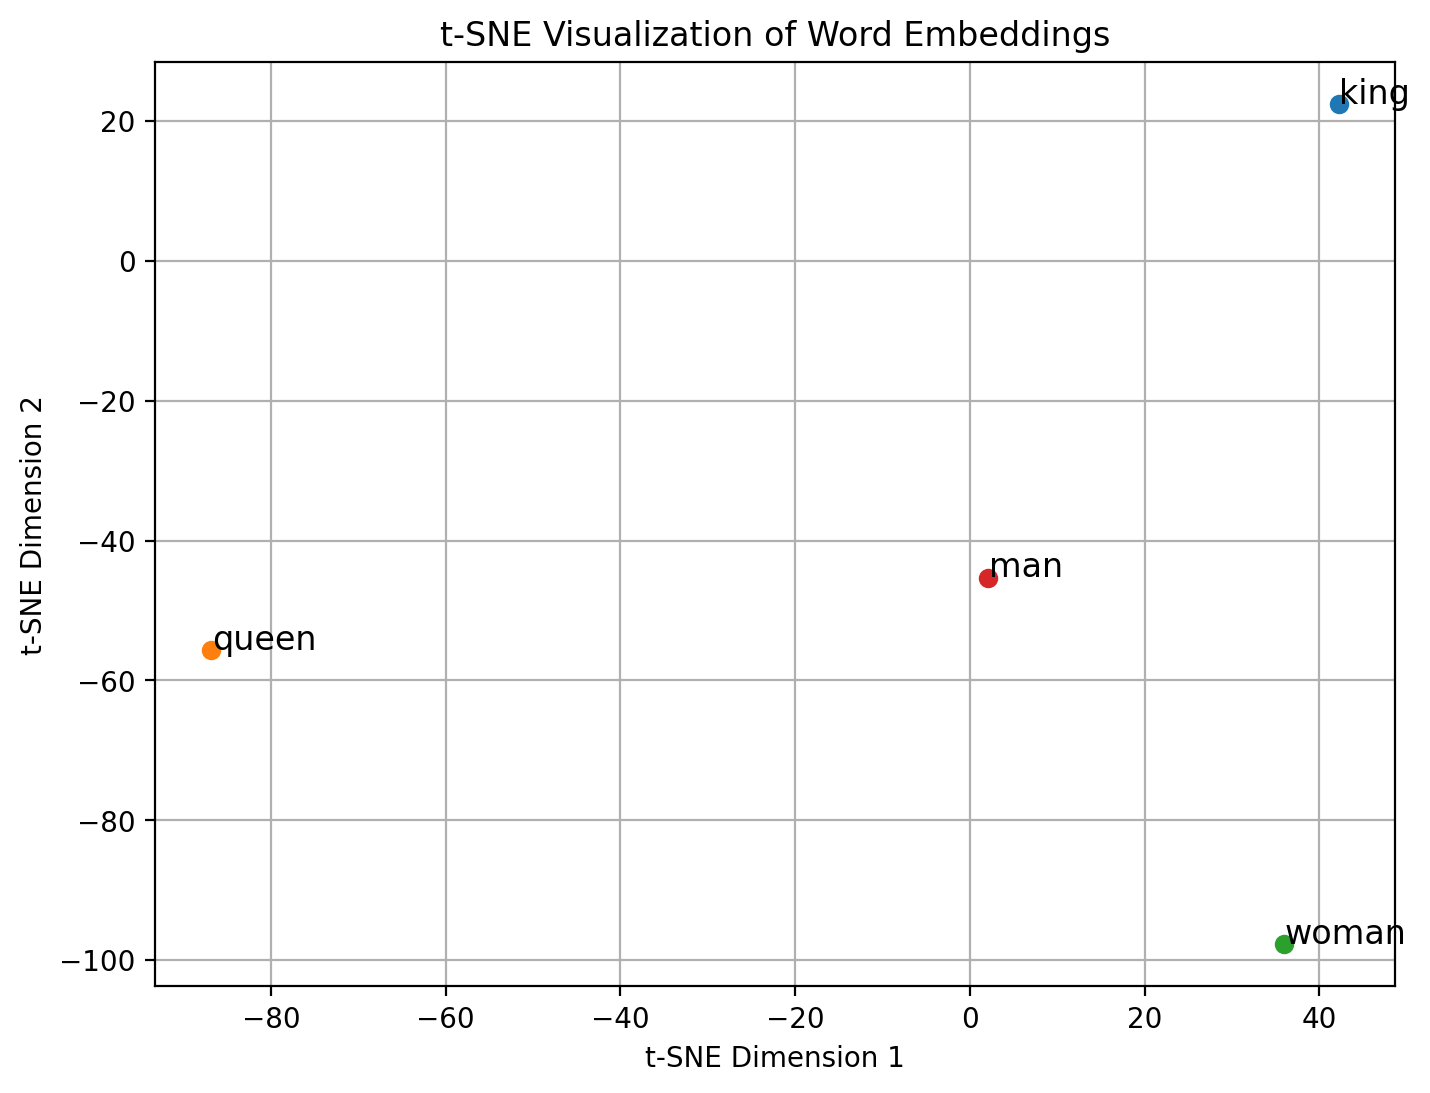

In [3]:
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming the model class is defined as in your earlier code
class NextWord(nn.Module):
    def __init__(self, block_size, vocab_size, emb_dim, hidden_size):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.lin1 = nn.Linear(block_size * emb_dim, hidden_size)
        self.lin2 = nn.Linear(hidden_size, vocab_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.emb(x)
        x = x.view(x.shape[0], -1)
        x = self.relu(self.lin1(x))
        x = self.lin2(x)
        return x

# Load the model
block_size = 5  # Same as used during model creation
vocab_size = len(Vocabulary)  # Vocabulary size from your data
emb_dim = 128  # Should match the embedding dimension used
hidden_size = 1024  # Should match the hidden layer size used
act_fn = 'tanh'

loaded_model = NextWord(block_size, vocab_size, emb_dim, hidden_size)
loaded_model.load_state_dict(torch.load(f'models_1k/model1k_{emb_dim}_{block_size}_{act_fn}.pth', map_location='cpu'))  # Change the path if necessary

# Get the embedding layer
emb = loaded_model.emb

# Sample words to visualize
sample_words = ['king', 'queen', 'woman', 'man']

# Extract embeddings for these words
sample_embeddings = torch.stack([emb(torch.tensor(Vocabulary[word])).detach() for word in sample_words]).numpy()

# Apply t-SNE to reduce embeddings to 2D with a lower perplexity
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
embeddings_2d = tsne.fit_transform(sample_embeddings)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))

# Plot each word as a point in 2D space
for i, word in enumerate(sample_words):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.text(embeddings_2d[i, 0] + 0.1, embeddings_2d[i, 1] + 0.1, word, fontsize=12)

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.grid(True)
plt.show()
